In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the CIFAR10 dataset from keras datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# 50,000 images where each image is of 32 x 32 pixels and the last 3 is
# the number of channels (Red, Green, Blue)
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

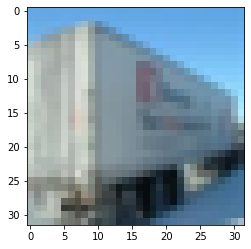

In [ ]:
# Let's get an image from the dataset (It's a truck)
# as a human we can tell that but the model doesn't 
# have eyes like us
plt.imshow(X_train[15])

In [ ]:
# Normalize the train data so that every pixel falls
# under the range of 0 and 1 (inclusive)
X_train = X_train / 255

In [ ]:
# Same for the test data
X_test = X_test / 255

In [ ]:
# We need to one hot encode the labels since our 
# model can only train on numbers and not alphabetical
#values
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)

In [ ]:
# Same for the test data
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Our model is structured like this
# Conv -> Pool -> Conv -> Pool

model = tf.keras.Sequential()

# CONVOLUTIONAL LAYER
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4),
                                 input_shape=(32, 32, 3),
                                 activation='relu'))
# POOLING LAYER
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4),
                                 input_shape=(32, 32, 3),
                                 activation='relu'))
# POOLING LAYER
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# Flatten our the data that is coming from the pooling layer
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))

# Multi class problems need softmax activation
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# We are using categorical cross entropy because 
# the problem is multi class where the number
# of classes are greater than 2
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
# Early stopping in order to avoid over fitting
# on our training data
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2
)

In [ ]:
# Let's train the model for 15 epochs
model.fit(X_train, y_train_cat, epochs=15,
          validation_data=(X_test, y_test_cat),
          callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 19s 5ms/step - loss: 1.5077 - accuracy: 0.4571 - val_loss: 1.3210 - val_accuracy: 0.5253
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1861 - accuracy: 0.5805 - val_loss: 1.1048 - val_accuracy: 0.6194
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0366 - accuracy: 0.6407 - val_loss: 1.0344 - val_accuracy: 0.6450
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9243 - accuracy: 0.6765 - val_loss: 1.0439 - val_accuracy: 0.6401
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8312 - accuracy: 0.7087 - val_loss: 1.0263 - val_accuracy: 0.6545
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7558 - accuracy: 0.7350 - val_loss: 1.0070 - val_accuracy: 0.6611
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6840 - accuracy: 0.7590 - val_loss: 0.9904 - val_accuracy

In [ ]:
# Get the loss curves
metrics = pd.DataFrame(model.history.history)

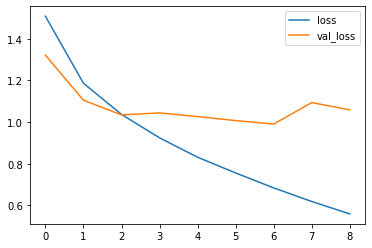

In [ ]:
# Our model is overfitting like hell.
metrics[['loss', 'val_loss']].plot()

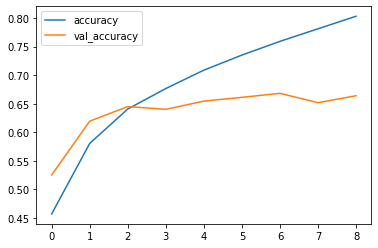

In [ ]:
# Seems like validation accuracy like the lower part of the plot
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
model.evaluate(X_test, y_test_cat, verbose=0)

[1.0586154460906982, 0.6639000177383423]

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [ ]:
# Overall confidence of the model each class
# Looks like our model is not very confident
# on number "5" which is dog (google the class names)
print(classification_report(y_test_cat, predictions))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.86      0.71      0.78      1000
           2       0.62      0.56      0.59      1000
           3       0.56      0.38      0.46      1000
           4       0.68      0.53      0.59      1000
           5       0.63      0.47      0.54      1000
           6       0.86      0.62      0.72      1000
           7       0.74      0.70      0.72      1000
           8       0.80      0.75      0.78      1000
           9       0.80      0.67      0.73      1000

   micro avg       0.73      0.61      0.67     10000
   macro avg       0.73      0.61      0.66     10000
weighted avg       0.73      0.61      0.66     10000
 samples avg       0.61      0.61      0.61     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
random_image = X_test[16]

In [ ]:
# Model is predicting 5 which is a dog
model.predict(random_image.reshape(1, 32, 32, 3)).argmax()

5

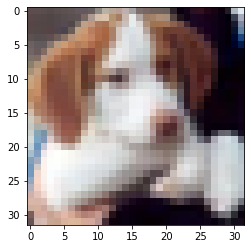

In [ ]:
# Boom Baby! the model predicted correctly.
plt.imshow(random_image)